In [151]:
# Imports
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
import pandas as pd
import dbfread as dbf
import fiona
import folium
import os
import json
import seaborn as sns

In [152]:
pwd

'/Users/daniellamesler/Documents/UW/WINTER_19/458/LAB3'

In [153]:
saep_bg10 = gpd.read_file('saep_bg10/saep_bg10.shp')
saep_bg10.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,INTPTLON10,INTPTLAT10,...,OHU2014,OHU2015,OHU2016,OHU2017,OHU2018,COHU00_10,PCOHU00_10,COHU10_18,PCOHU10_18,geometry
0,53,001,950100,1,530019501001,Block Group 1,G5030,S,-118.398815,47.150809,...,277.494,279.680,287.530,287.522,287.758,33.751,0.143,17.758,0.066,"POLYGON ((2077217.074095237 640954.0110817049,..."
1,53,001,950100,2,530019501002,Block Group 2,G5030,S,-118.351143,47.135101,...,524.831,521.228,517.427,516.077,524.645,3.398,0.007,-0.355,0.000,"POLYGON ((2165913.051240579 657352.8005365322,..."
2,53,001,950100,3,530019501003,Block Group 3,G5030,S,-118.382148,47.138222,...,246.344,243.965,242.033,241.365,245.491,-26.312,-0.097,-0.509,-0.002,"POLYGON ((2166254.454566129 657810.7137267586,..."
3,53,001,950200,1,530019502001,Block Group 1,G5030,S,-118.219484,46.874027,...,208.923,203.761,205.502,204.547,202.854,-21.255,-0.093,-5.146,-0.025,"POLYGON ((2150159.78406948 554295.8999707696, ..."
4,53,001,950200,2,530019502002,Block Group 2,G5030,S,-118.522323,46.968569,...,285.857,286.251,278.398,278.400,267.983,-1.330,-0.005,-22.017,-0.076,"POLYGON ((2082999.834788324 575018.8611698836,..."


In [154]:
# creating POP density column (people per square mile)
saep_bg10['PopDensity_2018'] = (saep_bg10.POP2018 / saep_bg10.ALANDMI)
saep_bg10.head()

# Create column that calculates "status" of urban or non-urban
Status = []

for row in saep_bg10.PopDensity_2018:
    if row >= 1000:
        Status.append('Urban')
    else:
        Status.append('Non-urban')
        
saep_bg10['Status_2018'] = Status

saep_bg10.head()
saep_bg10.tail()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,INTPTLON10,INTPTLAT10,...,OHU2016,OHU2017,OHU2018,COHU00_10,PCOHU00_10,COHU10_18,PCOHU10_18,geometry,PopDensity_2018,Status_2018
4778,53,077,940004,3,530779400043,Block Group 3,G5030,S,-120.428642,46.439915,...,620.051,620.207,620.938,-8.083,-0.013,4.938,0.008,"POLYGON ((1656015.130393771 402712.1668873799,...",3002.172794,Urban
4779,53,077,940005,1,530779400051,Block Group 1,G5030,S,-120.326667,46.380806,...,678.003,680.972,681.676,17.913,0.027,9.676,0.014,"POLYGON ((1681852.327849978 382559.1284340261,...",3104.761787,Urban
4780,53,077,940005,2,530779400052,Block Group 2,G5030,S,-120.309006,46.367887,...,591.758,601.102,601.230,-56.085,-0.089,24.230,0.042,"POLYGON ((1685877.296955983 378281.276297627, ...",1958.666950,Urban
4781,53,077,940006,1,530779400061,Block Group 1,G5030,S,-120.309106,46.386573,...,646.205,646.818,647.767,9.912,0.016,4.767,0.007,"POLYGON ((1692426.922662759 383109.8090466972,...",1946.988338,Urban
4782,53,077,940006,2,530779400062,Block Group 2,G5030,S,-120.299414,46.375016,...,506.093,505.784,505.792,-19.068,-0.036,1.792,0.004,"POLYGON ((1692412.413987683 378619.6410366478,...",5969.532609,Urban


In [155]:
#2018 population sum
Total_pop = saep_bg10.POP2018.sum()
print(Total_pop)

# land area sum
Total_LA = saep_bg10.ALANDMI.sum()
print(Total_LA)

7427569.999999999
66455.522


In [156]:
# percentage of the population of the state is urbanized 
# is not a loop...Still use a loop and make a new variable to store the totals. If the category is urban, then add to the total
Only_urban = saep_bg10[saep_bg10.Status_2018 == 'Urban']
Only_urban.POP2018.sum() / Total_pop *100

73.06413522861449

In [157]:
#  what percentage of the land area of the state is urbanized 
# is not a loop...
Only_urban.ALANDMI.sum() / Total_LA *100

2.2826440216661004

In [158]:
#create pop density column for each year, or just compare 00 to 18?
# creating POP density column for 2000 (people per square mile)
#saep_bg10['PopDensity_2000'] = (saep_bg10.POP2000 / saep_bg10.ALANDMI)
#saep_bg10.head()

#Decade_Status_Change = []

#for row in saep_bg10.PopDensity:
    #if row > saep_bg10.PopDensity_2000:
       # Decade_Status_Change.append('Urbanized')
    #if row < saep_bg10.PopDensity_2000:
     #   Decade_Status_Change.append('Deurbanized')
    #else:
       # Decade_Status_Change.append('No Change in Category')
        
#saep_bg10['Decade_Status_Change'] = Decade_Status_Change

# EMMI's CODE FOR CALC 2000
# Step 4 setup - looking at previous decade
# Need to calculate 2008 density and categories first

# Creating new columns with dummy values
saep_bg10['PopDensity_2008'] = None
saep_bg10['Status_2008'] = None
saep_bg10['block_change'] = None

for index, row in saep_bg10.iterrows():
    if row['ALANDMI'] == 0: # Land area field is 0
        saep_bg10.loc[index, 'PopDensity_2008'] = 0 # Avoids dividing by zero problem
        saep_bg10.loc[index, 'Status_2008'] = 'Rural' # Automatically classified as rural
    else:
        saep_bg10.loc[index, 'PopDensity_2008'] = (row['POP2008'] / row['ALANDMI']) # Calculates density from population and land area
        if saep_bg10.loc[index, 'PopDensity_2008'] >= 1000: # Density greater than 1000
            saep_bg10.loc[index, 'Status_2008'] = 'Urban'
        else: # Density less than 1000 per square mile
            saep_bg10.loc[index, 'Status_2008'] = 'Rural'

saep_bg10.tail()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,INTPTLON10,INTPTLAT10,...,COHU00_10,PCOHU00_10,COHU10_18,PCOHU10_18,geometry,PopDensity_2018,Status_2018,PopDensity_2008,Status_2008,block_change
4778,53,077,940004,3,530779400043,Block Group 3,G5030,S,-120.428642,46.439915,...,-8.083,-0.013,4.938,0.008,"POLYGON ((1656015.130393771 402712.1668873799,...",3002.172794,Urban,2959.42,Urban,None
4779,53,077,940005,1,530779400051,Block Group 1,G5030,S,-120.326667,46.380806,...,17.913,0.027,9.676,0.014,"POLYGON ((1681852.327849978 382559.1284340261,...",3104.761787,Urban,3013.04,Urban,None
4780,53,077,940005,2,530779400052,Block Group 2,G5030,S,-120.309006,46.367887,...,-56.085,-0.089,24.230,0.042,"POLYGON ((1685877.296955983 378281.276297627, ...",1958.666950,Urban,1915.55,Urban,None
4781,53,077,940006,1,530779400061,Block Group 1,G5030,S,-120.309106,46.386573,...,9.912,0.016,4.767,0.007,"POLYGON ((1692426.922662759 383109.8090466972,...",1946.988338,Urban,1920.03,Urban,None
4782,53,077,940006,2,530779400062,Block Group 2,G5030,S,-120.299414,46.375016,...,-19.068,-0.036,1.792,0.004,"POLYGON ((1692412.413987683 378619.6410366478,...",5969.532609,Urban,6075.46,Urban,None


In [148]:
# step 4 getting categorical (nominal) change

# used emmi's code for this part

Text(0.5, 1.0, '2008 Estimated Population Density in Washington State')

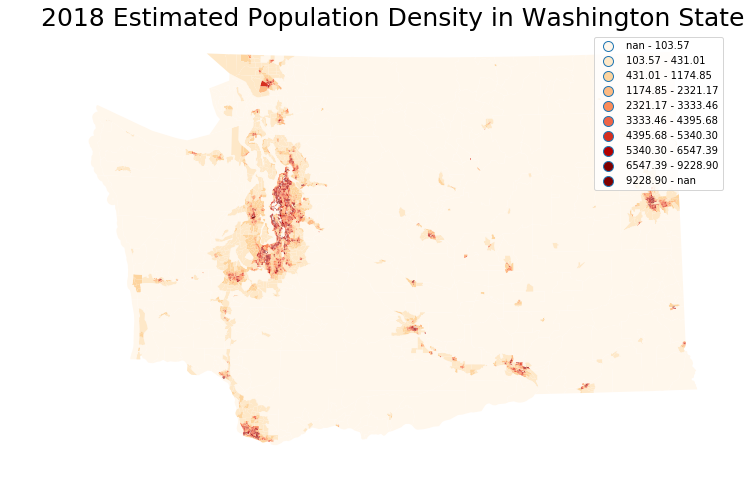

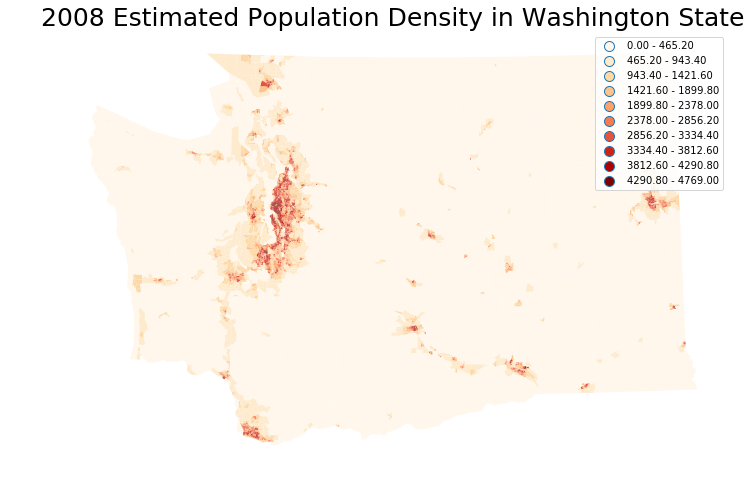

In [163]:
# STATIC MAPS
# plot 2018 density using matplotlib
fig1, ax = plt.subplots(1, figsize=(12, 8))
saep_bg10.plot(column="PopDensity_2018", scheme="Quantiles", k=10, cmap="OrRd", linewidth=0.0, ax=ax, edgecolor="0.8", legend=True)
ax.axis('off')
ax.set_title("2018 Estimated Population Density in Washington State", fontsize=25)


# Create colorbar as a legend
    #sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
    #sm._A = []
# add the colorbar to the figure
    #cbar = fig.colorbar(sm)

# plot 2008 density using matplotlib
fig2, ax = plt.subplots(1, figsize=(12, 8))
saep_bg10.plot(column="PopDensity_2008", scheme="Quantiles", k=10, cmap="OrRd", linewidth=0.0, ax=ax, edgecolor="0.8", legend=True)
ax.axis('off')
ax.set_title("2008 Estimated Population Density in Washington State", fontsize=25)

In [164]:
fig1.savefig("2018_popdensity.png", dpi=300)
fig2.savefig("2008_popdensity.png", dpi=300)

Text(0.5, 1.0, 'Urbanized Washington State, 2008')

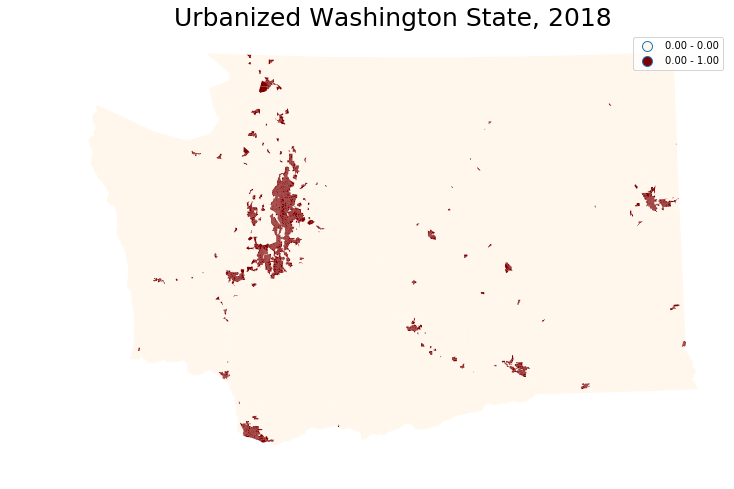

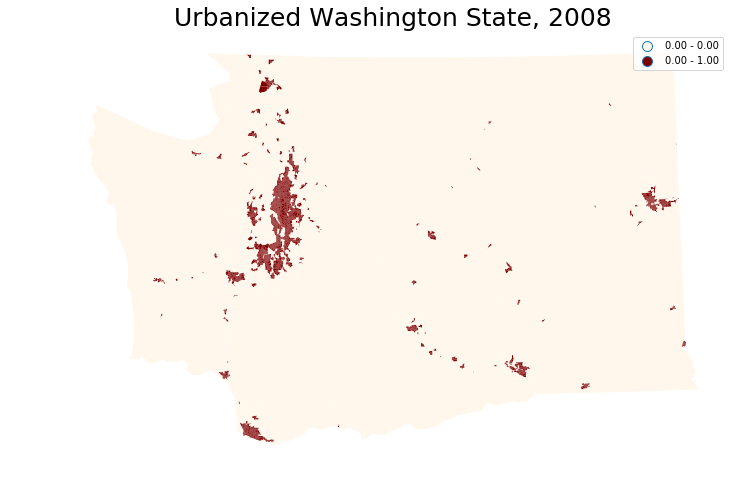

In [165]:
# plot 2018 status using matplotlib
fig3, ax = plt.subplots(1, figsize=(12, 8))
saep_bg10.plot(column="Status_2018", scheme="Quantiles", k=10, cmap="OrRd", linewidth=0.0, ax=ax, edgecolor="0.8", legend=True)
ax.axis('off')
ax.set_title("Urbanized Washington State, 2018", fontsize=25)


# Create colorbar as a legend
    #sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
    #sm._A = []
# add the colorbar to the figure
    #cbar = fig.colorbar(sm)
    
# plot 2008 status using matplotlib
fig4, ax = plt.subplots(1, figsize=(12, 8))
saep_bg10.plot(column="Status_2008", scheme="Quantiles", k=10, cmap="OrRd", linewidth=0.0, ax=ax, edgecolor="0.8", legend=True)
ax.axis('off')
ax.set_title("Urbanized Washington State, 2008", fontsize=25)

In [166]:
fig3.savefig("2018_urbanstatus.png", dpi=300)
fig4.savefig("2008_urbanstatus.png", dpi=300)

part 1 - emmis branch
part 2 - macklans
part 3 - macklans 
* add static density maps